# Coupon Recommendation System Using UserBehavior Data

In [63]:
import pandas as pd
import numpy  as np
import os
from datetime import datetime

In [64]:


os.chdir('C:\\Users\\DELL\\Desktop\\project 2\\Hubblemind project')

In [65]:
vehicle= pd.read_csv("coupon.csv")
vehicle

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [66]:
for col in vehicle.select_dtypes(include=['object']).columns:
    vehicle[col].fillna(vehicle[col].mode()[0], inplace=True)


In [67]:
# Step 3: Handle inconsistencies in categorical data
# Standardizing values (e.g., converting "less1" to "Less than 1")
vehicle = vehicle.replace({
    'CoffeeHouse': {'less1': 'Less than 1'},
    'CarryAway': {'less1': 'Less than 1'},
    'Bar': {'never': 'Never', 'Less1': 'Less than 1'},
    'RestaurantLessThan20': {'less1': 'Less than 1'},
    'Restaurant20To50': {'less1': 'Less than 1'}
})

In [68]:
vehicle.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
vehicle.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [70]:
# numerical & categorical columns

In [71]:
#This is to check the columns with missing values
vehicle.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [72]:
# this is to drop all the columns with too many missing values
#vehicle.drop(['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'],axis=1,inplace=True)

In [73]:
vehicle

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [74]:
null_value=pd.isnull(vehicle)
null_value

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
for column in vehicle.select_dtypes(include=['object']).columns:
    mode_value = vehicle[column].mode()[0]
    vehicle[column].fillna(mode_value, inplace=True)

In [76]:
#To check the total amount of missing values and NAN values.
pd.isnull(vehicle).sum().sum()

0

# one-hot encoding for categorical variables

In [77]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [78]:
#the unique values on destination column for encoding
vehicle['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [79]:
vehicle['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [80]:
vehicle['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [81]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
OHE = OneHotEncoder()

In [83]:
print(OHE)

OneHotEncoder()


In [84]:
#i had to do onehotencoder for only destination and weather because they have the same size of rows and columns
OHE.fit_transform(vehicle[['destination','weather']]).toarray()

array([[0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.]])

In [85]:
feature_array=OHE.fit_transform(vehicle[['destination','weather']]).toarray()

In [86]:
#using OHE for destination and weather and ohe for coupon
OHE.categories_

[array(['Home', 'No Urgent Place', 'Work'], dtype=object),
 array(['Rainy', 'Snowy', 'Sunny'], dtype=object)]

In [87]:
feature_labels=OHE.categories_

In [88]:
np.array(feature_labels).ravel()

array(['Home', 'No Urgent Place', 'Work', 'Rainy', 'Snowy', 'Sunny'],
      dtype=object)

In [89]:
feature_labels=np.array(feature_labels).ravel()

In [90]:
print(feature_labels)

['Home' 'No Urgent Place' 'Work' 'Rainy' 'Snowy' 'Sunny']


In [91]:
pd.DataFrame(feature_array,columns=feature_labels)

,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
12679,1.0,0.0,0.0,1.0,0.0,0.0
12680,0.0,0.0,1.0,1.0,0.0,0.0
12681,0.0,0.0,1.0,0.0,1.0,0.0
12682,0.0,0.0,1.0,0.0,1.0,0.0


In [92]:
features=pd.DataFrame(feature_array,columns=feature_labels)

In [93]:
features

,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
12679,1.0,0.0,0.0,1.0,0.0,0.0
12680,0.0,0.0,1.0,1.0,0.0,0.0
12681,0.0,0.0,1.0,0.0,1.0,0.0
12682,0.0,0.0,1.0,0.0,1.0,0.0


#For coupon, the size is different from the other catgorical data so i will do the onehotencoder alone and join it with the dataframe

In [94]:
ohe=OneHotEncoder()

In [95]:
print(ohe)

OneHotEncoder()


In [96]:
ohe.fit_transform(vehicle[['coupon']]).toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [97]:
feature_array2= ohe.fit_transform(vehicle[['coupon']]).toarray()

In [98]:
feature_array2

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [99]:
#ohe for coupon column alone.
ohe.categories_


[array(['Bar', 'Carry out & Take away', 'Coffee House',
        'Restaurant(20-50)', 'Restaurant(<20)'], dtype=object)]

In [100]:
feature_labels2=ohe.categories_

In [101]:
np.array(feature_labels2).ravel()

array(['Bar', 'Carry out & Take away', 'Coffee House',
       'Restaurant(20-50)', 'Restaurant(<20)'], dtype=object)

In [102]:
feature_labels2=np.array(feature_labels2).ravel()

In [103]:
print(feature_labels2)

['Bar' 'Carry out & Take away' 'Coffee House' 'Restaurant(20-50)'
 'Restaurant(<20)']


In [104]:
pd.DataFrame(feature_array2,columns=feature_labels2)

,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
12679,0.0,1.0,0.0,0.0,0.0
12680,0.0,1.0,0.0,0.0,0.0
12681,0.0,0.0,1.0,0.0,0.0
12682,1.0,0.0,0.0,0.0,0.0


In [105]:
features2=pd.DataFrame(feature_array,columns=feature_labels)
features2

,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
12679,1.0,0.0,0.0,1.0,0.0,0.0
12680,0.0,0.0,1.0,1.0,0.0,0.0
12681,0.0,0.0,1.0,0.0,1.0,0.0
12682,0.0,0.0,1.0,0.0,1.0,0.0


In [106]:
pd.concat([vehicle,features,features2],axis=1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Work,Rainy,Snowy,Sunny,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [107]:
vehicle_new=pd.concat([vehicle,features,features2],axis=1)

In [108]:
vehicle_new.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Work,Rainy,Snowy,Sunny,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [109]:
# to change the destination code to maker it easier to model.
vehicle_new['destination']=vehicle_new['destination'].astype('category')
vehicle_new['destination']=vehicle_new['destination'].cat.codes

vehicle_new['weather']=vehicle_new['weather'].astype('category')
vehicle_new['weather']=vehicle_new['weather'].cat.codes


vehicle_new['coupon']=vehicle_new['coupon'].astype('category')
vehicle_new['coupon']=vehicle_new['coupon'].cat.codes

vehicle_new['gender']=vehicle_new['gender'].astype('category')
vehicle_new['gender']=vehicle_new['gender'].cat.codes

vehicle_new['maritalStatus']=vehicle_new['maritalStatus'].astype('category')
vehicle_new['maritalStatus']=vehicle_new['maritalStatus'].cat.codes

vehicle_new['time']=vehicle_new['time'].astype('category')
vehicle_new['time']=vehicle_new['time'].cat.codes

vehicle_new['passanger']=vehicle_new['passanger'].astype('category')
vehicle_new['passanger']=vehicle_new['passanger'].cat.codes

vehicle_new['expiration']=vehicle_new['expiration'].astype('category')
vehicle_new['expiration']=vehicle_new['expiration'].cat.codes

vehicle_new['age']=vehicle_new['age'].astype('category')
vehicle_new['age']=vehicle_new['age'].cat.codes

vehicle_new['education']=vehicle_new['education'].astype('category')
vehicle_new['education']=vehicle_new['education'].cat.codes

vehicle_new['occupation']=vehicle_new['occupation'].astype('category')
vehicle_new['occupation']=vehicle_new['occupation'].cat.codes

vehicle_new['income']=vehicle_new['income'].astype('category')
vehicle_new['income']=vehicle_new['income'].cat.codes


vehicle_new['Bar']=vehicle_new['Bar'].astype('category')
vehicle_new['Bar']=vehicle_new['Bar'].cat.codes

vehicle_new['CoffeeHouse']=vehicle_new['CoffeeHouse'].astype('category')
vehicle_new['CoffeeHouse']=vehicle_new['CoffeeHouse'].cat.codes

vehicle_new['CarryAway']=vehicle_new['CarryAway'].astype('category')
vehicle_new['CarryAway']=vehicle_new['CarryAway'].cat.codes

vehicle_new['RestaurantLessThan20']=vehicle_new['RestaurantLessThan20'].astype('category')
vehicle_new['RestaurantLessThan20']=vehicle_new['RestaurantLessThan20'].cat.codes

vehicle_new['Restaurant20To50']=vehicle_new['Restaurant20To50'].astype('category')
vehicle_new['Restaurant20To50']=vehicle_new['Restaurant20To50'].cat.codes

vehicle_new['car']=vehicle_new['car'].astype('category')
vehicle_new['car']=vehicle_new['car'].cat.codes


vehicle_new=vehicle_new
vehicle_new

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Work,Rainy,Snowy,Sunny,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
0,1,0,2,55,2,4,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,2,80,0,2,1,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1,2,80,0,1,1,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,2,80,2,2,1,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,2,80,2,2,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,55,3,1,0,1,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12680,2,0,0,55,4,1,0,1,1,2,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
12681,2,0,1,30,4,2,0,1,1,2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12682,2,0,1,30,4,0,0,1,1,2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
numerical_features = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
scaler = StandardScaler()
vehicle[numerical_features] = scaler.fit_transform(vehicle[numerical_features])

# Display the processed dataset structure and a sample
vehicle.info(),vehicle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  float64
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  object 
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  car                   12684 non-null  object 
 15  Bar                

(None,
        destination  passanger weather  temperature  time  \
 0  No Urgent Place      Alone   Sunny    -0.433430   2PM   
 1  No Urgent Place  Friend(s)   Sunny     0.871799  10AM   
 2  No Urgent Place  Friend(s)   Sunny     0.871799  10AM   
 3  No Urgent Place  Friend(s)   Sunny     0.871799   2PM   
 4  No Urgent Place  Friend(s)   Sunny     0.871799   2PM   
 
                   coupon expiration  gender age      maritalStatus  ...  \
 0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
 1           Coffee House         2h  Female  21  Unmarried partner  ...   
 2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
 3           Coffee House         2h  Female  21  Unmarried partner  ...   
 4           Coffee House         1d  Female  21  Unmarried partner  ...   
 
    CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
 0        never       1~3                  4~8              1~3   
 1        never       1~3        

# Scale numerical variables using standard-scaler.


In [112]:
vehicle.dtypes

destination              object
passanger                object
weather                  object
temperature             float64
time                     object
coupon                   object
expiration               object
gender                   object
age                      object
maritalStatus            object
has_children              int64
education                object
occupation               object
income                   object
car                      object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min        float64
toCoupon_GEQ15min       float64
toCoupon_GEQ25min       float64
direction_same            int64
direction_opp             int64
Y                         int64
dtype: object

# Week 2: 
# Relationship within the data through visualization and correlation analysis

In [113]:
#Relationship between target variable(y) and categorical featuressuch as weather,time,passenger and age

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

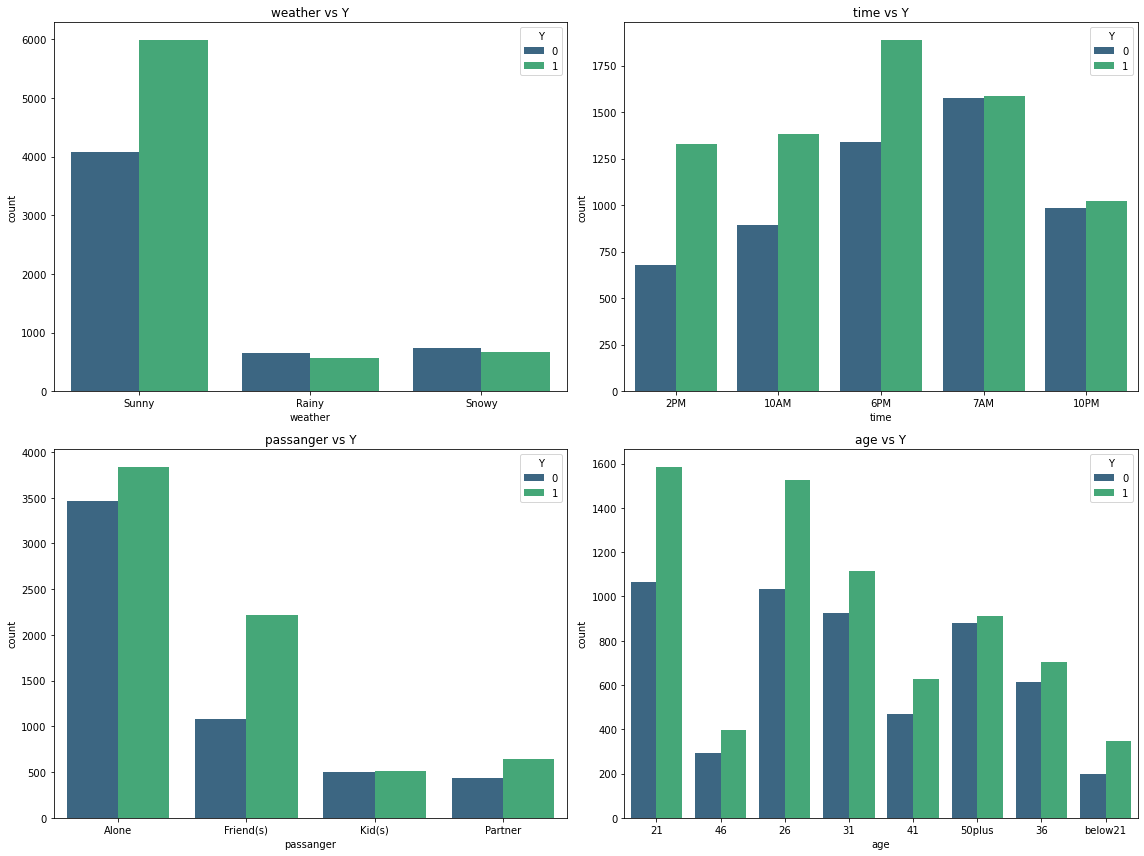

In [115]:
def plot_categorical_vs_target(vehicle, categorical_features, target):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()
    for i, feature in enumerate(categorical_features):
        sns.countplot(data=vehicle, x=feature, hue=target, ax=axes[i], palette="viridis")
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].legend(title=target, loc='upper right')
    plt.tight_layout()
    plt.show()

categorical_features = ['weather', 'time', 'passanger', 'age']
plot_categorical_vs_target(vehicle, categorical_features, 'Y')


In [116]:
#def plot_trend_analysis(vehicle_new, feature, target):
trend_data = vehicle_new.groupby(feature)[target].mean().reset_index()
sns.barplot(vehicle=trend_data, x=feature, y=target, palette="coolwarm")
plt.title(f'Acceptance Rate by {feature}')
plt.ylabel('Coupon Acceptance Rate')
plt.xlabel(feature)
plt.xticks(rotation=45)
plt.show()

for feature in categorical_features:
    plot_trend_analysis(vehicle, feature, 'Y')


NameError: name 'feature' is not defined

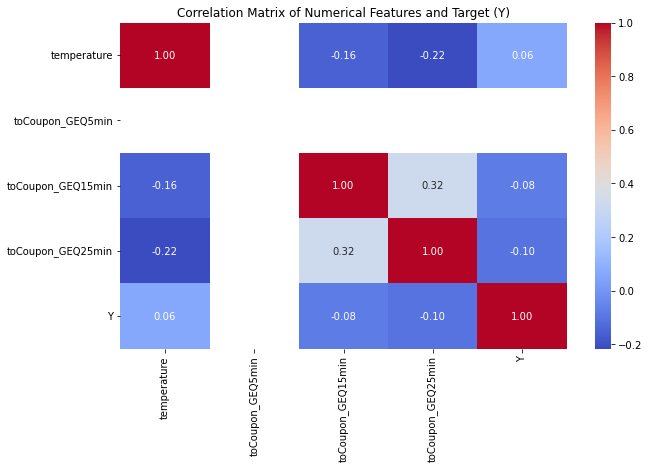

In [117]:
numerical_features = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
correlation_data = vehicle[numerical_features + ['Y']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features and Target (Y)")
plt.show()

In [118]:
# Extract numerical features and target variable
numerical_features = ['temperature', 'has_children', 'toCoupon_GEQ5min',
                      'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']
target_variable = 'Y'

# Calculate correlation matrix for numerical features and target variable
correlation_matrix = vehicle_new[numerical_features + [target_variable]].corr()

# Extract correlation values for the target variable
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

correlation_with_target


temperature          0.061240
has_children        -0.045557
toCoupon_GEQ5min          NaN
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
direction_same       0.014570
direction_opp       -0.014570
Name: Y, dtype: float64

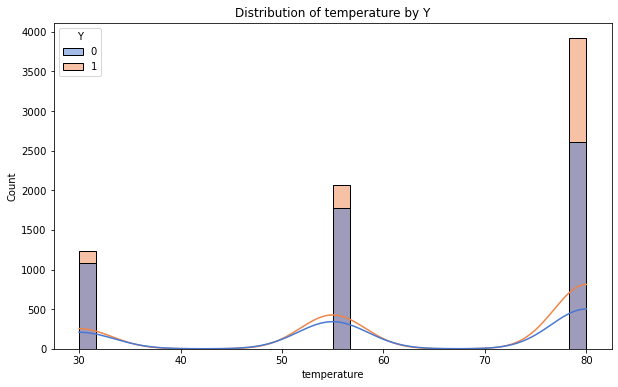

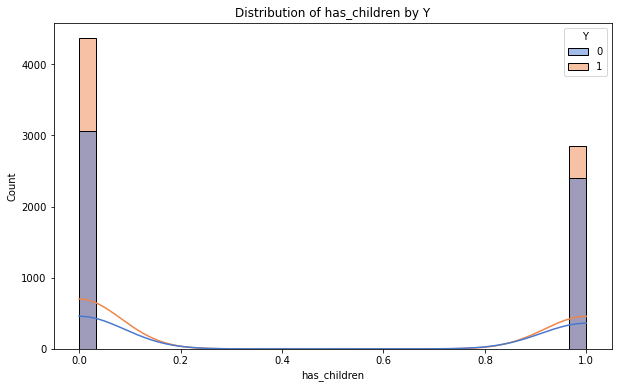

LinAlgError: singular matrix

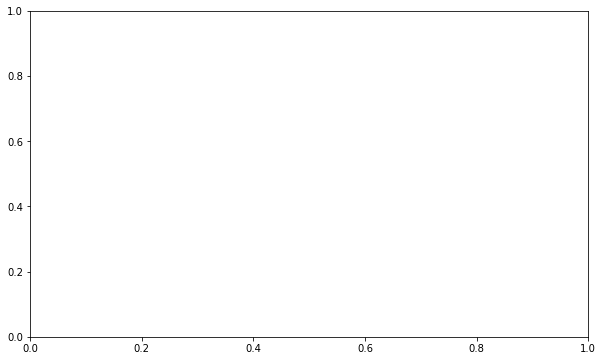

In [119]:
def plot_numerical_distributions(vehicle_new, numerical_features, target):
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(vehicle_new, x=feature, hue=target, kde=True, palette="muted", bins=30)
        plt.title(f'Distribution of {feature} by {target}')
        plt.show()

plot_numerical_distributions(vehicle_new, numerical_features, 'Y')

# Week 3: Machine Learning Models

 #It focuses on training machine learning models to predict whether a coupon will beaccepted based on the cleaned and pre-processed data. Interns will implement different models,compare their performance, and tune them for better accuracy


In [ ]:
#Data split into X and y

In [120]:
y = vehicle_new['Y']
y

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Y, Length: 12684, dtype: int64

In [121]:
x=vehicle_new.drop('Y',axis=1)
x

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Work,Rainy,Snowy,Sunny,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
0,1,0,2,55,2,4,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,2,80,0,2,1,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1,2,80,0,1,1,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,2,80,2,2,1,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,2,80,2,2,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,55,3,1,0,1,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12680,2,0,0,55,4,1,0,1,1,2,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
12681,2,0,1,30,4,2,0,1,1,2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12682,2,0,1,30,4,0,0,1,1,2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [122]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


In [123]:
#80 % percent training
x_train

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Work,Rainy,Snowy,Sunny,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
710,1,3,2,80,3,4,1,1,3,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
12015,0,3,0,55,3,1,0,1,0,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5864,0,0,2,80,3,4,1,0,1,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5656,1,1,2,80,3,4,0,0,2,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3472,1,1,2,80,0,1,1,0,4,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,2,55,3,0,0,1,5,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
12119,0,0,2,30,3,1,0,0,3,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8039,1,1,2,80,2,3,1,1,2,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6936,1,1,2,80,2,3,1,0,4,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [124]:
# 20% testing set.
x_test

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Work,Rainy,Snowy,Sunny,Home,No Urgent Place,Work,Rainy,Snowy,Sunny
762,2,0,2,80,4,1,1,0,6,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
11873,1,1,1,30,2,4,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9631,0,0,2,80,3,1,0,1,5,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
10312,2,0,0,55,4,1,1,0,2,1,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2334,2,0,2,55,4,4,0,0,2,2,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,1,1,2,80,2,4,1,1,1,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9309,2,0,0,55,4,1,1,1,7,2,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9597,2,0,1,30,4,1,0,0,2,3,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9333,2,0,2,80,4,4,0,0,5,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# LogisticRegression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [126]:
model=LogisticRegression()

In [127]:
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
y_pred=model.predict(x_test)

In [129]:
model.score(x_test,y_test)

0.6342136381553015

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
print(confusion_matrix(y_test,y_pred))

[[ 517  601]
 [ 327 1092]]


In [132]:
from sklearn.metrics import classification_report

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.46      0.53      1118
           1       0.65      0.77      0.70      1419

    accuracy                           0.63      2537
   macro avg       0.63      0.62      0.61      2537
weighted avg       0.63      0.63      0.62      2537



# DecisionTreeClassifier

In [134]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [135]:
dtc=DecisionTreeClassifier()


In [136]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [137]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [138]:
Y_pred=dtc.predict(x_test)

In [139]:
print(confusion_matrix(y_test,Y_pred))

[[ 701  417]
 [ 417 1002]]


In [140]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1118
           1       0.71      0.71      0.71      1419

    accuracy                           0.67      2537
   macro avg       0.67      0.67      0.67      2537
weighted avg       0.67      0.67      0.67      2537



In [141]:
dtc.feature_importances_

array([0.01150691, 0.03102332, 0.00643669, 0.02843804, 0.03256436,
       0.09384194, 0.03416776, 0.02019285, 0.07092862, 0.03948928,
       0.01539633, 0.05361929, 0.09762712, 0.07929951, 0.00362303,
       0.06787332, 0.06992185, 0.04644462, 0.04048875, 0.04725139,
       0.        , 0.02621004, 0.02292569, 0.00838388, 0.00568287,
       0.00423461, 0.01833249, 0.00271379, 0.0033696 , 0.00184221,
       0.00095687, 0.00300092, 0.00153816, 0.00223593, 0.00289013,
       0.00179827, 0.00374957])

In [142]:
x.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Home', 'No Urgent Place', 'Work',
       'Rainy', 'Snowy', 'Sunny', 'Home', 'No Urgent Place', 'Work', 'Rainy',
       'Snowy', 'Sunny'],
      dtype='object')

In [143]:
feature=pd.DataFrame(dtc.feature_importances_,x.columns)

In [144]:
feature.head(31)

,0
destination,0.011507
passanger,0.031023
weather,0.006437
temperature,0.028438
time,0.032564
coupon,0.093842
expiration,0.034168
gender,0.020193
age,0.070929
maritalStatus,0.039489


In [145]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

In [146]:
dtc2=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.04)

In [147]:
dtc2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [148]:
Y_pred2=dtc2.predict(x_test)

In [149]:
print(confusion_matrix(y_test,Y_pred2))

[[   0 1118]
 [   0 1419]]


In [150]:
print(classification_report(y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1118
           1       0.56      1.00      0.72      1419

    accuracy                           0.56      2537
   macro avg       0.28      0.50      0.36      2537
weighted avg       0.31      0.56      0.40      2537



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
feature2=pd.DataFrame(dtc2.feature_importances_,x.columns)

In [152]:
#feature2(15)

# Random Forest Classier

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf = RandomForestClassifier()

In [155]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [156]:
y1_pred=rf.predict(x_test)

In [157]:
#accuracy
rf.score(x_test,y_test)

0.7299960583366181

In [158]:
accuracy = accuracy_score(y_test, y1_pred)
accuracy

0.7299960583366181

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import random

In [160]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1118
           1       0.74      0.79      0.77      1419

    accuracy                           0.73      2537
   macro avg       0.73      0.72      0.72      2537
weighted avg       0.73      0.73      0.73      2537



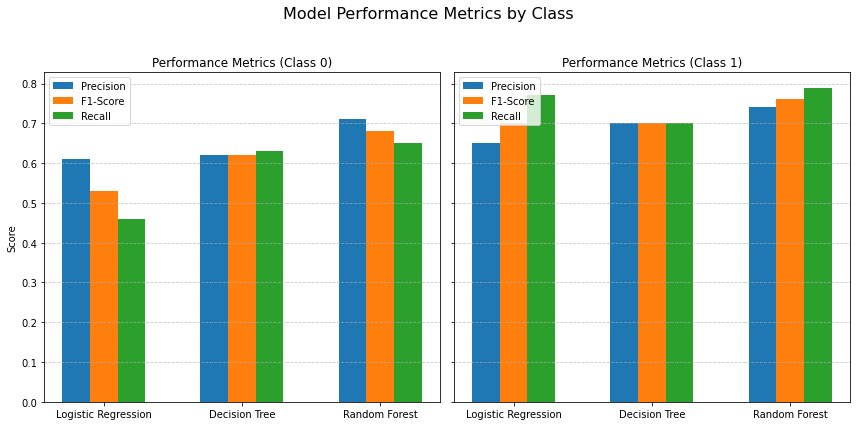

In [173]:
#Visualization of all the model and their relationship.
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar graph
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
metrics_0 = {
    "Precision": [0.61, 0.62, 0.71],
    "F1-Score": [0.53, 0.62, 0.68],
    "Recall": [0.46, 0.63, 0.65],
}
metrics_1 = {
    "Precision": [0.65, 0.70, 0.74],
    "F1-Score": [0.70, 0.70, 0.76],
    "Recall": [0.77, 0.70, 0.79],
}

x = np.arange(len(models))  # the label locations
width = 0.2  # width of the bars

# Create subplots for both classes
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for class 0
for i, (metric, values) in enumerate(metrics_0.items()):
    ax[0].bar(x + (i - 1) * width, values, width, label=metric)
ax[0].set_title("Performance Metrics (Class 0)")
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].set_ylabel("Score")
ax[0].legend(loc="upper left")
ax[0].grid(axis="y", linestyle="--", alpha=0.7)

# Plot for class 1
for i, (metric, values) in enumerate(metrics_1.items()):
    ax[1].bar(x + (i - 1) * width, values, width, label=metric)
ax[1].set_title("Performance Metrics (Class 1)")
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend(loc="upper left")
ax[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and show plot
fig.suptitle("Model Performance Metrics by Class", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# using GridSearchCV

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [164]:
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
#Number of features to consider at every split
max_features=['auto','sqrt']
#maximum number of levels in tree
max_depth=[2,4]
#maximum number of samples required tosplit anode
min_samples_split=[2,5]
#minimium number of samples required at each leaf node
min_samples_leaf=[1,2]
#Method of selecting samples of training each tree
bootstrap=[True,False]

In [165]:
param_grid={'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth':max_depth,
           'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
           'bootstrap':bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [166]:
rf=RandomForestClassifier()

In [168]:
rf_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [169]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 56}

In [170]:
print(f'Train Accuracy -: {rf_Grid.score(x_train,y_train):.3f}')
print(f'Test Accuracy -: {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy -: 0.655
Test Accuracy -: 0.644
